## 1. INTRODUCE


Kami dari kelompok 2 yang beranggotakan:
1. Annisa Aprilia
2. Rika Anggraini
3. Rendhi Andrianto

Dataset ini merupakan data yang berisikan transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Kartu kredit adalah alat pembayaran yang memungkinkan pemegang kartu untuk melakukan pembelian dan transaksi keuangan tanpa harus membayar tunai secara langsung. Kartu kredit biasanya dikeluarkan oleh bank atau lembaga keuangan lainnya dan terhubung dengan sebuah rekening kredit. Pemegang kartu kredit dapat menggunakan limit kredit yang telah ditentukan untuk berbagai macam pembelian, baik secara daring maupun di toko fisik. berikut adalah keterangan atribut yang ada pada dataset ini:

1. CUST_ID - Nomor identifikasi pemegang kartu kredit. Ini merupakan atribut kategorikal yang unik untuk setiap pengguna.
2. BALANCE - Jumlah saldo yang tersisa di akun pengguna untuk melakukan pembelian. Ini menunjukkan seberapa banyak uang yang masih tersedia di akun.
3. BALANCE_FREQUENCY - Seberapa sering saldo diperbarui, dinyatakan dalam rentang skor antara 0 sampai 1. Skor 1 menunjukkan pembaruan yang sering, sedangkan skor 0 menunjukkan pembaruan yang jarang dilakukan.
4. PURCHASES - Jumlah pembelian yang dilakukan dari akun pengguna. Ini mencakup semua pembelian yang dilakukan.
5. ONEOFF_PURCHASES - Jumlah maksimum pembelian yang dilakukan dalam satu transaksi.
6. INSTALLMENTS_PURCHASES - Jumlah pembelian yang dilakukan dengan sistem pembayaran secara cicilan.
7. CASH_ADVANCE - Jumlah uang tunai yang diberikan oleh pengguna.
8. PURCHASES_FREQUENCY - Seberapa sering pembelian dilakukan, dengan skor antara 0 sampai 1. Skor 1 menunjukkan pembelian yang sering dilakukan, sedangkan skor 0 menunjukkan pembelian yang jarang dilakukan.
9. ONEOFF_PURCHASES_FREQUENCY - Seberapa sering pembelian dilakukan dalam satu transaksi tunggal.
10. PURCHASES_INSTALLMENTS_FREQUENCY - Seberapa sering pembelian dilakukan dengan sistem pembayaran cicilan, dengan skor 0 sampai 1. Skor 1 menunjukkan pembelian dengan cicilan yang sering dilakukan, sedangkan skor 0 menunjukkan pembelian dengan cicilan yang jarang dilakukan.
11. CASH_ADVANCE_FREQUENCY - Seberapa sering uang tunai diminta atau diambil oleh pengguna.
12. CASH_ADVANCE_TRX - Jumlah transaksi yang dilakukan menggunakan uang tunai.
13. PURCHASES_TRX - Jumlah transaksi pembelian yang dilakukan.
14. CREDIT_LIMIT - Batas kredit dari kartu kredit untuk pengguna.
15. PAYMENTS - Jumlah pembayaran yang dilakukan oleh pengguna.
16. MINIMUM_PAYMENTS - Jumlah minimum pembayaran yang harus dibayarkan oleh pengguna.
17. PRC_FULL_PAYMENT - Persentase pembayaran penuh yang dibayarkan oleh pengguna dari total tagihan. 0 sampai 1
18. TENURE - Waktu pelayanan kartu kredit untuk pengguna, atau lamanya pengguna telah memiliki kartu kredit ini.

Dataset ini menawarkan pemahaman yang mendalam tentang kebiasaan penggunaan kartu kredit, preferensi belanja, dan pola pembayaran, menciptakan landasan yang kokoh untuk analisis lebih lanjut dalam konteks keuangan dan perilaku konsumen. Informasi yang terkandung dalam setiap atribut dapat digunakan untuk mengidentifikasi tren pengeluaran, pola pembayaran, dan karakteristik unik dari masing-masing pemegang kartu, memberikan kesempatan untuk merumuskan strategi pemasaran yang lebih efektif, pemahaman risiko keuangan, atau pengembangan layanan keuangan yang lebih sesuai dengan kebutuhan pelanggan. Dengan demikian, dataset ini tidak hanya memberikan gambaran tentang aspek transaksional, tetapi juga dapat diartikan sebagai sumber daya berharga dalam pengambilan keputusan yang berbasis data di bidang keuangan dan analisis konsumen.

## 2. IMPORT PUSTAKA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy import stats
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, silhouette_score, davies_bouldin_score,  calinski_harabasz_score, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn import metrics

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import DBSCAN

## 3. DATA LOADING

In [3]:
# Menentukan path atau URL dataset sesuai dengan lokasi dataset
df = pd.read_csv('CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df.shape

(8950, 18)

Dataset ini berisikan 8.950 baris dan 18 kolom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Pada atribut yang ditampilkan, yang memiliki tipe data object ada 1, float 14, dan integer 3

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [7]:
df.describe(include=float).T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


syntax diatas untuk memperlihatkan deskripsi pada data yang mengandung tipe data float

## 4. DATA CLEANING

### 4.1 Mencari Nilai Unique

In [8]:
pd.DataFrame(df.nunique()).reset_index().rename(columns={'index':'nama kolom', 0 : 'nilai unik'})

,nama kolom,nilai unik
0,CUST_ID,8950
1,BALANCE,8871
2,BALANCE_FREQUENCY,43
3,PURCHASES,6203
4,ONEOFF_PURCHASES,4014
5,INSTALLMENTS_PURCHASES,4452
6,CASH_ADVANCE,4323
7,PURCHASES_FREQUENCY,47
8,ONEOFF_PURCHASES_FREQUENCY,47
9,PURCHASES_INSTALLMENTS_FREQUENCY,47


Pada tahap ini kita dapat mengetahui nilai unique dari dataset kartu kredit. istilah unique" atau "unik" merujuk pada nilai-nilai yang bersifat unik atau tidak memiliki duplikat dalam suatu dataset, atau dengan kata lain unique adalah mengidentifikasi dan penghapusan nilai-nilai yang sama atau duplikat dari suatu kolom atau dataset. Dari hasil diatas, diketahui bahwa semua atribut memiliki nilai unik.

### 4.2 Menghapus Missing Value

In [9]:
pd.DataFrame(df.isna().sum())

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [10]:
df.dropna(inplace=True)
df.reset_index(drop=True)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
4,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8632,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8633,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8634,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Missing value (nilai yang hilang) merujuk pada keadaan di mana nilai atau entri dalam dataset tidak ada atau tidak tercatat. Ketika menganalisis data, keberadaan missing value dapat mempengaruhi validitas dan keandalan hasil analisis. Dari dataset kartu kredit, terdapat 1 atribut yang memiliki 313 missing value yaitu atribut MINIMUM_PAYMENTS. maka dari itu, kami menghapus missing value tersebut agar tidak terjadi kesalahan dalam interpretasi data.

In [11]:
pd.DataFrame(df.isna().sum())

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


Setelah menghapus missing value, dapat dilihat dari hasil ini jika sudah tidak ada lagi nilai yang hilang. (angka 0 menandakan tidak adanya missing value dalam sebuah atribut)

## 4.3 Membuat DataFrame Baru

In [12]:
data_new = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']]
data_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Pembuatan dataframe baru ini bertujuan untuk mengecualikan atau menghilangkan atribut CUST_ID. Alasan mengapa atribut CUST_ID tidak kami pakai karena tipe data nya merupakan object dan hanya berisikan nomor id pemegang kartu kredit sehingga kami merasa atribut ini tidak penting dalam analisis yang akan kami lakukan.

### 4.4 Mencari Outliers

In [13]:
# Menghitung Q1, Q3, dan IQR
# Menghitung Q1, Q3, dan IQR
q1 = data_new.quantile(0.25)
q3 = data_new.quantile(0.75)
iqr = q3 - q1
# Mengidentifikasi outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data_new[(data_new < lower_bound) | ( data_new > upper_bound)]

# Menampilkan hasil
print("Kuartil Pertama (Q1):", q1)
print("\nKuartil Ketiga (Q3):", q3)
print("\nInterquartile Range (IQR):", iqr)



Kuartil Pertama (Q1): BALANCE                              148.095189
BALANCE_FREQUENCY                      0.909091
PURCHASES                             43.367500
ONEOFF_PURCHASES                       0.000000
INSTALLMENTS_PURCHASES                 0.000000
CASH_ADVANCE                           0.000000
PURCHASES_FREQUENCY                    0.083333
ONEOFF_PURCHASES_FREQUENCY             0.000000
PURCHASES_INSTALLMENTS_FREQUENCY       0.000000
CASH_ADVANCE_FREQUENCY                 0.000000
CASH_ADVANCE_TRX                       0.000000
PURCHASES_TRX                          1.000000
CREDIT_LIMIT                        1600.000000
PAYMENTS                             418.559237
MINIMUM_PAYMENTS                     169.163545
PRC_FULL_PAYMENT                       0.000000
TENURE                                12.000000
Name: 0.25, dtype: float64

Kuartil Ketiga (Q3): BALANCE                             2105.195853
BALANCE_FREQUENCY                      1.000000
PURCHASES        

In [14]:
print(outliers)

      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0         NaN                NaN        NaN               NaN   
1         NaN                NaN        NaN               NaN   
2         NaN                NaN        NaN               NaN   
4         NaN                NaN        NaN               NaN   
5         NaN                NaN        NaN               NaN   
...       ...                ...        ...               ...   
8943      NaN           0.500000        NaN               NaN   
8945      NaN                NaN        NaN               NaN   
8947      NaN                NaN        NaN               NaN   
8948      NaN                NaN        NaN               NaN   
8949      NaN           0.666667        NaN               NaN   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        NaN           NaN                  NaN   
1                        NaN   6442.945483                  NaN   
2                 

Outliers adalah nilai-nilai yang jauh dari nilai-nilai lain dalam suatu distribusi. Kami menggunakan IQR untuk menemukan outliers karena IQR memberikan pendekatan yang lebih tahan terhadap fluktuasi atau variasi kecil dalam data dibandingkan dengan jangkauan keseluruhan. Menggunakan nilai kuartil memperhitungkan struktur data tengah dan mengurangi dampak dari nilai ekstrem yang mungkin memengaruhi hasil analisis. Dari hasil yang terlihat di atas, terdapat beberapa atribut yang memiliki outlier.

## 5. Ekplorasi data

### 5.1 measure of central tendency : mean, median

In [15]:
data_new.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8636.0,1601.224893,2095.571300,0.000000,148.095189,916.855459,2105.195853,19043.13856
BALANCE_FREQUENCY,8636.0,0.895035,0.207697,0.000000,0.909091,1.000000,1.000000,1.00000
PURCHASES,8636.0,1025.433874,2167.107984,0.000000,43.367500,375.405000,1145.980000,49039.57000
ONEOFF_PURCHASES,8636.0,604.901438,1684.307803,0.000000,0.000000,44.995000,599.100000,40761.25000
INSTALLMENTS_PURCHASES,8636.0,420.843533,917.245182,0.000000,0.000000,94.785000,484.147500,22500.00000
CASH_ADVANCE,8636.0,994.175523,2121.458303,0.000000,0.000000,0.000000,1132.385490,47137.21176
PURCHASES_FREQUENCY,8636.0,0.496000,0.401273,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8636.0,0.205909,0.300054,0.000000,0.000000,0.083333,0.333333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8636.0,0.368820,0.398093,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8636.0,0.137604,0.201791,0.000000,0.000000,0.000000,0.250000,1.50000


In [16]:
print('nilai mediannya sebagai berikut :')
data_new.median()

nilai mediannya sebagai berikut :


BALANCE                              916.855459
BALANCE_FREQUENCY                      1.000000
PURCHASES                            375.405000
ONEOFF_PURCHASES                      44.995000
INSTALLMENTS_PURCHASES                94.785000
CASH_ADVANCE                           0.000000
PURCHASES_FREQUENCY                    0.500000
ONEOFF_PURCHASES_FREQUENCY             0.083333
PURCHASES_INSTALLMENTS_FREQUENCY       0.166667
CASH_ADVANCE_FREQUENCY                 0.000000
CASH_ADVANCE_TRX                       0.000000
PURCHASES_TRX                          7.000000
CREDIT_LIMIT                        3000.000000
PAYMENTS                             896.675701
MINIMUM_PAYMENTS                     312.452292
PRC_FULL_PAYMENT                       0.000000
TENURE                                12.000000
dtype: float64

dengan penggunaan .describe() dapat membantu mencari nilai mean dan median dari dataset kartu kredit ini. mean adalah nilai rata rata dan median adalah nilai tengah. Pada hasil diatas nilai mean dapat dilihat dari kolom mean, dan median dapat dilihat dari kolom 50%. Selain dengan .describe() penggunaan .median() juga dapat dilakukan untuk melihat nilai median dari etribut dalam dataset.

### 5.2 Measure of central tendency : modus

In [17]:
data_new.mode().iloc[0]

BALANCE                                0.000000
BALANCE_FREQUENCY                      1.000000
PURCHASES                              0.000000
ONEOFF_PURCHASES                       0.000000
INSTALLMENTS_PURCHASES                 0.000000
CASH_ADVANCE                           0.000000
PURCHASES_FREQUENCY                    1.000000
ONEOFF_PURCHASES_FREQUENCY             0.000000
PURCHASES_INSTALLMENTS_FREQUENCY       0.000000
CASH_ADVANCE_FREQUENCY                 0.000000
CASH_ADVANCE_TRX                       0.000000
PURCHASES_TRX                          0.000000
CREDIT_LIMIT                        3000.000000
PAYMENTS                               0.049513
MINIMUM_PAYMENTS                     299.351881
PRC_FULL_PAYMENT                       0.000000
TENURE                                12.000000
Name: 0, dtype: float64


Modus adalah nilai yang paling sering muncul dalam suatu set data. Untuk menampilkan nilai modus, kami menggunakan .mode()

### 5.3 Measure of spread : Range

In [18]:
nilai_max = data_new.max()
nilai_max

BALANCE                             19043.13856
BALANCE_FREQUENCY                       1.00000
PURCHASES                           49039.57000
ONEOFF_PURCHASES                    40761.25000
INSTALLMENTS_PURCHASES              22500.00000
CASH_ADVANCE                        47137.21176
PURCHASES_FREQUENCY                     1.00000
ONEOFF_PURCHASES_FREQUENCY              1.00000
PURCHASES_INSTALLMENTS_FREQUENCY        1.00000
CASH_ADVANCE_FREQUENCY                  1.50000
CASH_ADVANCE_TRX                      123.00000
PURCHASES_TRX                         358.00000
CREDIT_LIMIT                        30000.00000
PAYMENTS                            50721.48336
MINIMUM_PAYMENTS                    76406.20752
PRC_FULL_PAYMENT                        1.00000
TENURE                                 12.00000
dtype: float64

In [19]:
nilai_min = data_new.min()
nilai_min

BALANCE                              0.000000
BALANCE_FREQUENCY                    0.000000
PURCHASES                            0.000000
ONEOFF_PURCHASES                     0.000000
INSTALLMENTS_PURCHASES               0.000000
CASH_ADVANCE                         0.000000
PURCHASES_FREQUENCY                  0.000000
ONEOFF_PURCHASES_FREQUENCY           0.000000
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000
CASH_ADVANCE_FREQUENCY               0.000000
CASH_ADVANCE_TRX                     0.000000
PURCHASES_TRX                        0.000000
CREDIT_LIMIT                        50.000000
PAYMENTS                             0.049513
MINIMUM_PAYMENTS                     0.019163
PRC_FULL_PAYMENT                     0.000000
TENURE                               6.000000
dtype: float64

In [20]:
print('nilai rangenya yaitu :')
measure_range = nilai_max - nilai_min
measure_range

nilai rangenya yaitu :


BALANCE                             19043.138560
BALANCE_FREQUENCY                       1.000000
PURCHASES                           49039.570000
ONEOFF_PURCHASES                    40761.250000
INSTALLMENTS_PURCHASES              22500.000000
CASH_ADVANCE                        47137.211760
PURCHASES_FREQUENCY                     1.000000
ONEOFF_PURCHASES_FREQUENCY              1.000000
PURCHASES_INSTALLMENTS_FREQUENCY        1.000000
CASH_ADVANCE_FREQUENCY                  1.500000
CASH_ADVANCE_TRX                      123.000000
PURCHASES_TRX                         358.000000
CREDIT_LIMIT                        29950.000000
PAYMENTS                            50721.433847
MINIMUM_PAYMENTS                    76406.188357
PRC_FULL_PAYMENT                        1.000000
TENURE                                  6.000000
dtype: float64

Range adalah ukuran statistik yang mengukur sejauh mana variasi atau penyebaran data dari nilai terkecil hingga nilai terbesar dalam suatu set data. Untuk menghitung range, kami perlu mengurangkan nilai terkecil dari nilai terbesar dalam set data. Nilai range dari dataset kartu kredit ditampilkan lewat variabel measure_range.

### 5.4 Measure of spread : variance

In [21]:
data_new.var().reset_index().rename(
    columns={'index': 'column name', 0 : 'variance'})

,column name,variance
0,BALANCE,4.391419e+06
1,BALANCE_FREQUENCY,4.313799e-02
2,PURCHASES,4.696357e+06
3,ONEOFF_PURCHASES,2.836893e+06
4,INSTALLMENTS_PURCHASES,8.413387e+05
5,CASH_ADVANCE,4.500585e+06
6,PURCHASES_FREQUENCY,1.610197e-01
7,ONEOFF_PURCHASES_FREQUENCY,9.003217e-02
8,PURCHASES_INSTALLMENTS_FREQUENCY,1.584780e-01
9,CASH_ADVANCE_FREQUENCY,4.071978e-02


Varians adalah ukuran statistik yang mengukur seberapa jauh setiap nilai dalam sebuah set data dari nilai rata-rata (mean) dari data tersebut. Varians memberikan informasi tentang sebaran atau variasi data. dalam hasil di atas, varians dari atribut memiliki rentang 4 hingga 9. Rentang 4 hingga 9 menunjukkan bahwa atribut tersebut memiliki tingkat variabilitas yang sedang. Artinya, nilai-nilai atribut tidak terlalu terkonsentrasi di sekitar nilai rata-rata, tetapi juga tidak memiliki variasi yang sangat besar.

### 5.6 Measure of spread : standard deviation

In [22]:
data_new.std().reset_index().rename(
    columns={'index': 'column name', 0 : 'Standard Deviation'})

,column name,Standard Deviation
0,BALANCE,2095.571300
1,BALANCE_FREQUENCY,0.207697
2,PURCHASES,2167.107984
3,ONEOFF_PURCHASES,1684.307803
4,INSTALLMENTS_PURCHASES,917.245182
5,CASH_ADVANCE,2121.458303
6,PURCHASES_FREQUENCY,0.401273
7,ONEOFF_PURCHASES_FREQUENCY,0.300054
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.398093
9,CASH_ADVANCE_FREQUENCY,0.201791


Standar deviasi adalah ukuran statistik yang mengukur seberapa jauh setiap nilai dalam sebuah set data dari nilai rata-rata (mean) dari data tersebut. Standar deviasi menyediakan informasi tentang sebaran atau variasi data dan seberapa tersebar nilai-nilai di sekitar rata-rata. dari hasil di atas, standar deviasi nya memiliki rentang 0,2 hingga 3659. Jika rentang standar deviasi mencakup nilai dari 0,2 hingga 3659, ini menggambarkan tingkat variabilitas yang sangat tinggi. Namun, jika terdapat banyak nilai standar deviasi atribut 0 dalam dataset maka tingkat variabilitas atribut tersebut relatif moderat.

### 5.7 Visualisasi Data

### 5.7.1 Histogram

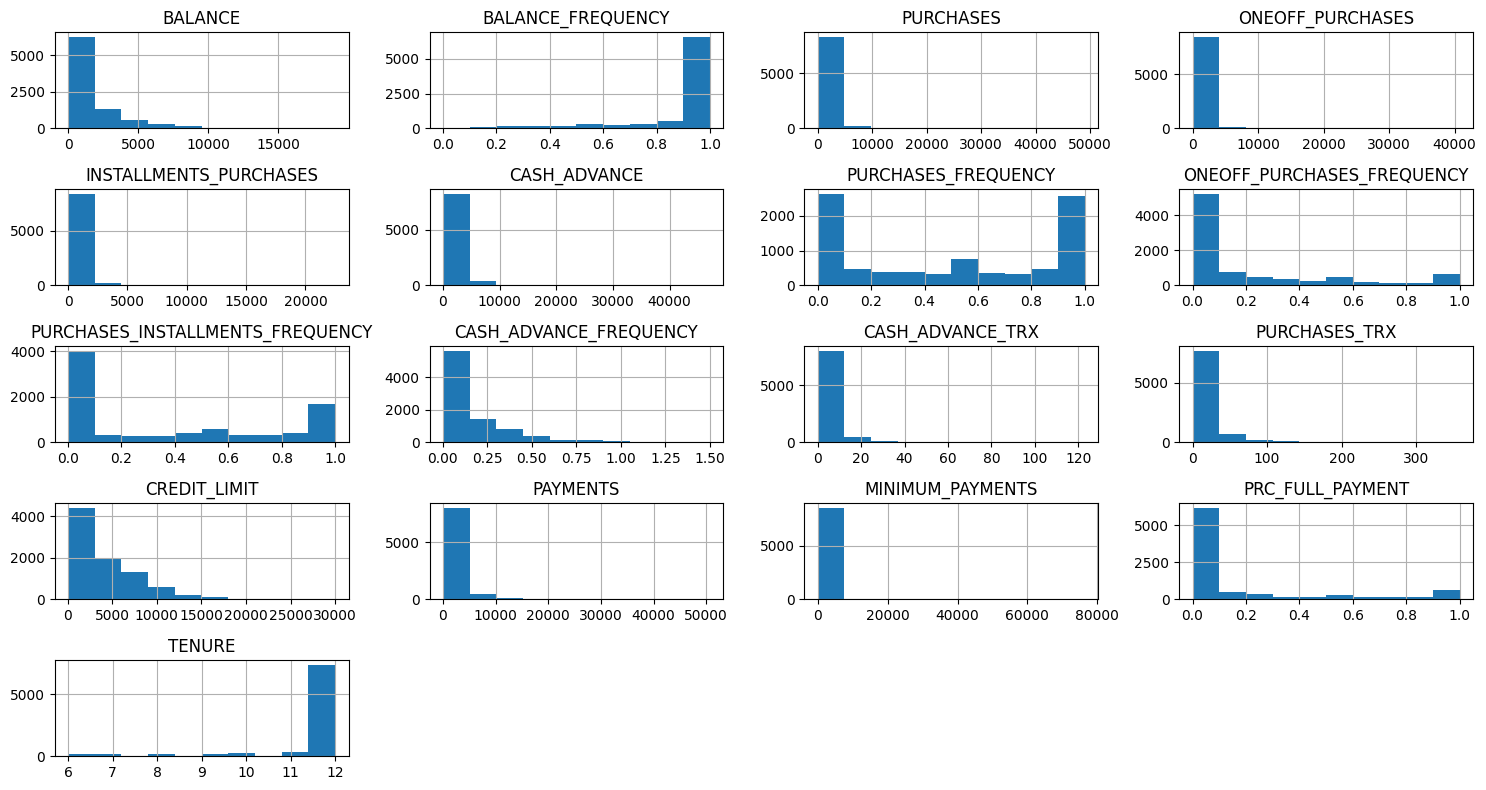

In [23]:
# menampilkan histogram dari dataset
data_new.hist(figsize=(15, 8))
plt.title('Histogram data_new')
plt.tight_layout()
plt.show()

Hasil di atas adalah visualisasi data histogram dari dataset kartu kredit. 
Histogram adalah grafik visual yang digunakan untuk merepresentasikan distribusi frekuensi atau sebaran data numerik. dalam visualisasi tersebut dapat dijabarkan:
1. BALANCE memiliki distribusi yang condong ke kiri
2. BALANCE_FREQUENCY memiliki distribusi yang condong ke kanan
3. PURCHASES memiliki distribusi yang condong ke kiri
4. ONEOFF_PURCHASES memiliki distribusi yang condong ke kiri
5. INSTALLMENT_PURCHASES memiliki distribusi yang condong ke kiri
6. CASH_ADVANCE memiliki distribusi yang condong ke kiri
7. PURCHASES_FREQUENCY memiliki distribusi yang normal
8. ONEOFF_PURCHASES memiliki distribusi yang condong ke kiri
9. PURCHASES_INSTALLMENT_FREQUENCY memiliki distribusi yang condong ke kiri
10. CASH_ADVANCE_FREQUENCY memiliki distribusi yang condong ke kiri
11. CASH_ADVANCE_TRX memiliki distribusi yang condong ke kiri
12. PURCHASES_TRX memiliki distribusi yang condong ke kiri
13. CREDIT_LIMIT memiliki distribusi yang condong ke kiri
14. PAYMENTS memiliki distribusi yang condong ke kiri
15. MINIMUM_PAYMENTS memiliki distribusi yang condong ke kiri
16. PRC_FULL_PAYMENT memiliki distribusi yang condong ke kiri
17. TENURE memiliki distribusi yang condong ke kanan

### 5.7.2 Scatter Plot untuk Outliers


Scatterplot adalah jenis grafik dua dimensi yang digunakan untuk menunjukkan hubungan antara dua variabel atau serangkaian data. kami menggunakan 4 atribut (BALANCE, PURCHASES, PAYMENTS, CASH_ADVANCE) sebagai contoh untuk visualisasi data scatter plot.

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


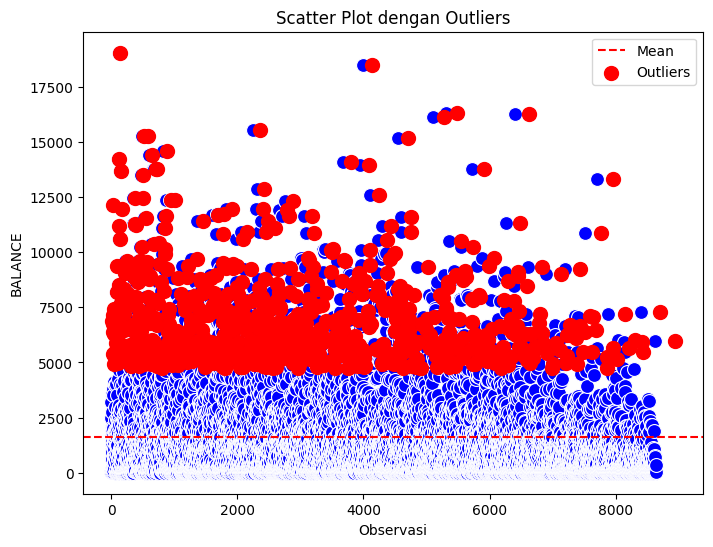

In [24]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=range(1, len(df) + 1), y='BALANCE', data=df, color='blue', s=100)

# Menambahkan garis rata-rata atau median sebagai referensi
mean_line = plt.axhline(y=df['BALANCE'].mean(), color='red', linestyle='--', label='Mean')

# Menandai outlier pada scatter plot
outliers = df[df['BALANCE'] > df['BALANCE'].mean() + 1.5 * df['BALANCE'].std()]
plt.scatter(outliers.index + 1, outliers['BALANCE'], color='red', s=100, label='Outliers')

# Menambahkan label dan judul
plt.title('Scatter Plot dengan Outliers')
plt.xlabel('Observasi')
plt.ylabel('BALANCE')

# Menampilkan legend
plt.legend()

# Menampilkan plot
plt.show()

Dari hasil scatter plot pada atribut balance, berikut adalah penjelasannya:
1. garis merah putus-putus menandakan nilai rata rata. Diketahui rata-rata nya berada pada kisaran +/- 2400.
2. lingkaran merah adalah nilai outliers. berada di kisaran +/- 5000.

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


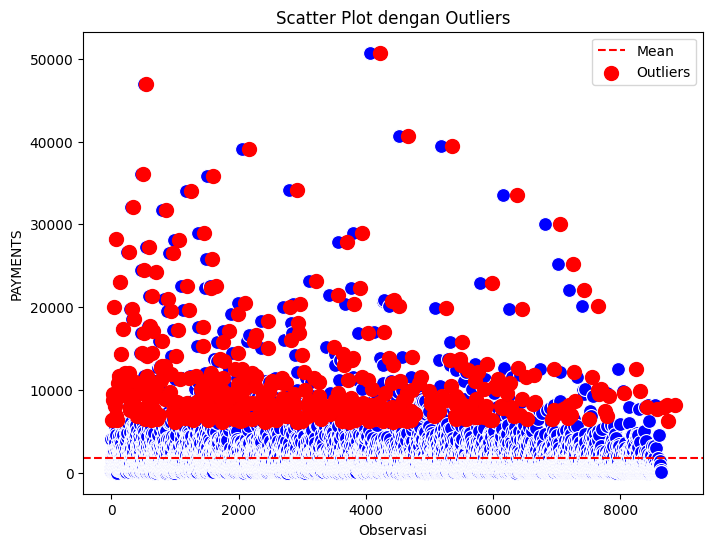

In [25]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=range(1, len(df) + 1), y='PAYMENTS', data=df, color='blue', s=100)

# Menambahkan garis rata-rata atau median sebagai referensi
mean_line = plt.axhline(y=df['PAYMENTS'].mean(), color='red', linestyle='--', label='Mean')

# Menandai outlier pada scatter plot
outliers = df[df['PAYMENTS'] > df['PAYMENTS'].mean() + 1.5 * df['PAYMENTS'].std()]
plt.scatter(outliers.index + 1, outliers['PAYMENTS'], color='red', s=100, label='Outliers')

# Menambahkan label dan judul
plt.title('Scatter Plot dengan Outliers')
plt.xlabel('Observasi')
plt.ylabel('PAYMENTS')

# Menampilkan legend
plt.legend()

# Menampilkan plot
plt.show()

Dari hasil scatter plot pada atribut payments, berikut adalah penjelasannya:
1. garis merah putus-putus menandakan nilai rata rata. Diketahui rata-rata nya berada pada kisaran < 1000.
2. lingkaran merah adalah nilai outliers. berada di kisaran +/- 1000.

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


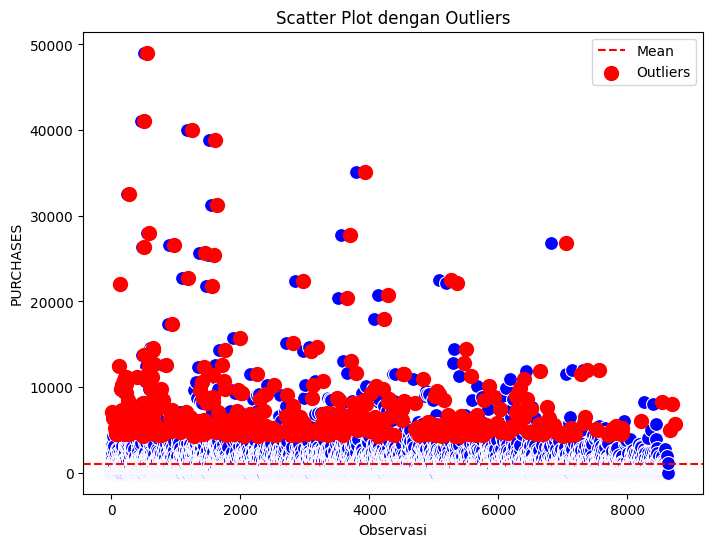

In [26]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=range(1, len(df) + 1), y='PURCHASES', data=df, color='blue', s=100)

# Menambahkan garis rata-rata atau median sebagai referensi
mean_line = plt.axhline(y=df['PURCHASES'].mean(), color='red', linestyle='--', label='Mean')

# Menandai outlier pada scatter plot
outliers = df[df['PURCHASES'] > df['PURCHASES'].mean() + 1.5 * df['PURCHASES'].std()]
plt.scatter(outliers.index + 1, outliers['PURCHASES'], color='red', s=100, label='Outliers')

# Menambahkan label dan judul
plt.title('Scatter Plot dengan Outliers')
plt.xlabel('Observasi')
plt.ylabel('PURCHASES')

# Menampilkan legend
plt.legend()

# Menampilkan plot
plt.show()

Dari hasil scatter plot pada atribut purchases, berikut adalah penjelasannya:
1. garis merah putus-putus menandakan nilai rata rata. Diketahui rata-rata nya berada pada kisaran +/- 100.
2. lingkaran merah adalah nilai outliers. berada di kisaran +/- 250.

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


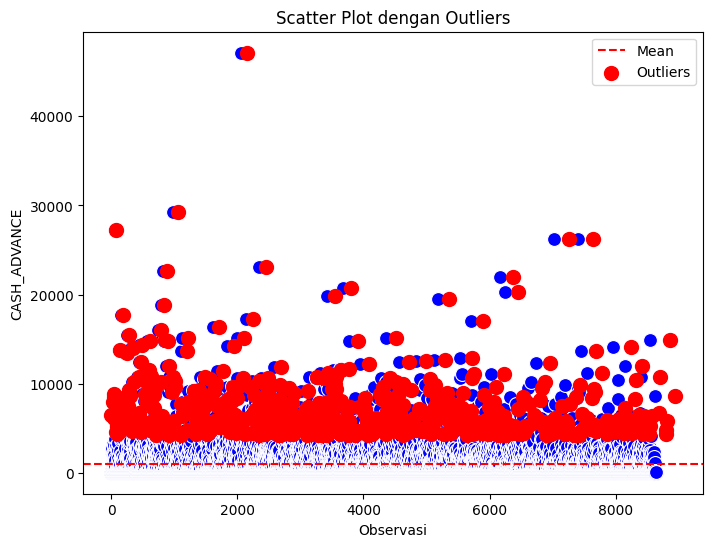

In [27]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=range(1, len(df) + 1), y='CASH_ADVANCE', data=df, color='blue', s=100)

# Menambahkan garis rata-rata atau median sebagai referensi
mean_line = plt.axhline(y=df['CASH_ADVANCE'].mean(), color='red', linestyle='--', label='Mean')

# Menandai outlier pada scatter plot
outliers = df[df['CASH_ADVANCE'] > df['CASH_ADVANCE'].mean() + 1.5 * df['CASH_ADVANCE'].std()]
plt.scatter(outliers.index + 1, outliers['CASH_ADVANCE'], color='red', s=100, label='Outliers')

# Menambahkan label dan judul
plt.title('Scatter Plot dengan Outliers')
plt.xlabel('Observasi')
plt.ylabel('CASH_ADVANCE')

# Menampilkan legend
plt.legend()

# Menampilkan plot
plt.show()

Dari hasil scatter plot pada atribut cash_advance, berikut adalah penjelasannya:
1. garis merah putus-putus menandakan nilai rata rata. Diketahui rata-rata nya berada pada kisaran +/- 100.
2. lingkaran merah adalah nilai outliers. berada di kisaran +/- 250.

In [28]:
# Removing (statistical) outliers for BALANCE
Q1 = data_new['BALANCE'].quantile(0.05)
Q3 = data_new['BALANCE'].quantile(0.95)
IQR = Q3 - Q1
data_new = data_new[(data_new['BALANCE'] >= Q1 - 1.5*IQR) & (data_new['BALANCE'] <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for PURCHASES
Q1 = data_new['PURCHASES'].quantile(0.05)
Q3 = data_new['PURCHASES'].quantile(0.95)
IQR = Q3 - Q1
data_new = data_new[(data_new['PURCHASES'] >= Q1 - 1.5*IQR) & (data_new['PURCHASES'] <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for ONEOFF_PURCHASES
Q1 = data_new['ONEOFF_PURCHASES'].quantile(0.05)
Q3 = data_new['ONEOFF_PURCHASES'].quantile(0.95)
IQR = Q3 - Q1
data_new = data_new[(data_new['ONEOFF_PURCHASES'] >= Q1 - 1.5*IQR) & (data_new['ONEOFF_PURCHASES'] <= Q3 + 1.5*IQR)]
 # Removing (statistical) outliers for INSTALLMENTS_PURCHASES'
Q1 = data_new['ONEOFF_PURCHASES'].quantile(0.05)
Q3 = data_new['ONEOFF_PURCHASES'].quantile(0.95)
IQR = Q3 - Q1
data_new = data_new[(data_new['ONEOFF_PURCHASES'] >= Q1 - 1.5*IQR) & (data_new['ONEOFF_PURCHASES'] <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for CASH_ADVANCE
Q1 = data_new['CASH_ADVANCE'].quantile(0.05)
Q3 = data_new['CASH_ADVANCE'].quantile(0.95)
IQR = Q3 - Q1
data_new = data_new[(data_new['CASH_ADVANCE'] >= Q1 - 1.5*IQR) & (data_new['CASH_ADVANCE'] <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for CREDIT_LIMIT
Q1 = data_new['CREDIT_LIMIT'].quantile(0.05)
Q3 = data_new['CREDIT_LIMIT'].quantile(0.95)
IQR = Q3 - Q1
data_new = data_new[(data_new['CREDIT_LIMIT']>= Q1 - 1.5*IQR) & (data_new['CREDIT_LIMIT'] <= Q3 + 1.5*IQR)]
# Removing (statistical) outliers for PURCHASES
Q1 = data_new['PAYMENTS'].quantile(0.05)
Q3 = data_new['PAYMENTS'].quantile(0.95)
IQR = Q3 - Q1
data_new = data_new[(data_new['PAYMENTS'] >= Q1 - 1.5*IQR) & (data_new['PAYMENTS'] <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for PURCHASES
Q1 = data_new['MINIMUM_PAYMENTS'].quantile(0.05)
Q3 = data_new['MINIMUM_PAYMENTS'].quantile(0.95)
IQR = Q3 - Q1
data_new = data_new[(data_new['MINIMUM_PAYMENTS'] >= Q1 - 1.5*IQR) & (data_new['MINIMUM_PAYMENTS'] <= Q3 + 1.5*IQR)]


In [29]:
print(data_new)

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8943     5.871712           0.500000      20.90             20.90   
8945    28.493517           1.000000     291.12              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.9

Setelah visualisasi data menggunakan scatterplot untuk melihat nilai outliers, kami menghilangkan nilai outliers tersebut untuk meningkatkan konsistensi dan stabilitas pada dataset.

## 6 data preprocessing

### 6.1 Correlation Matrix

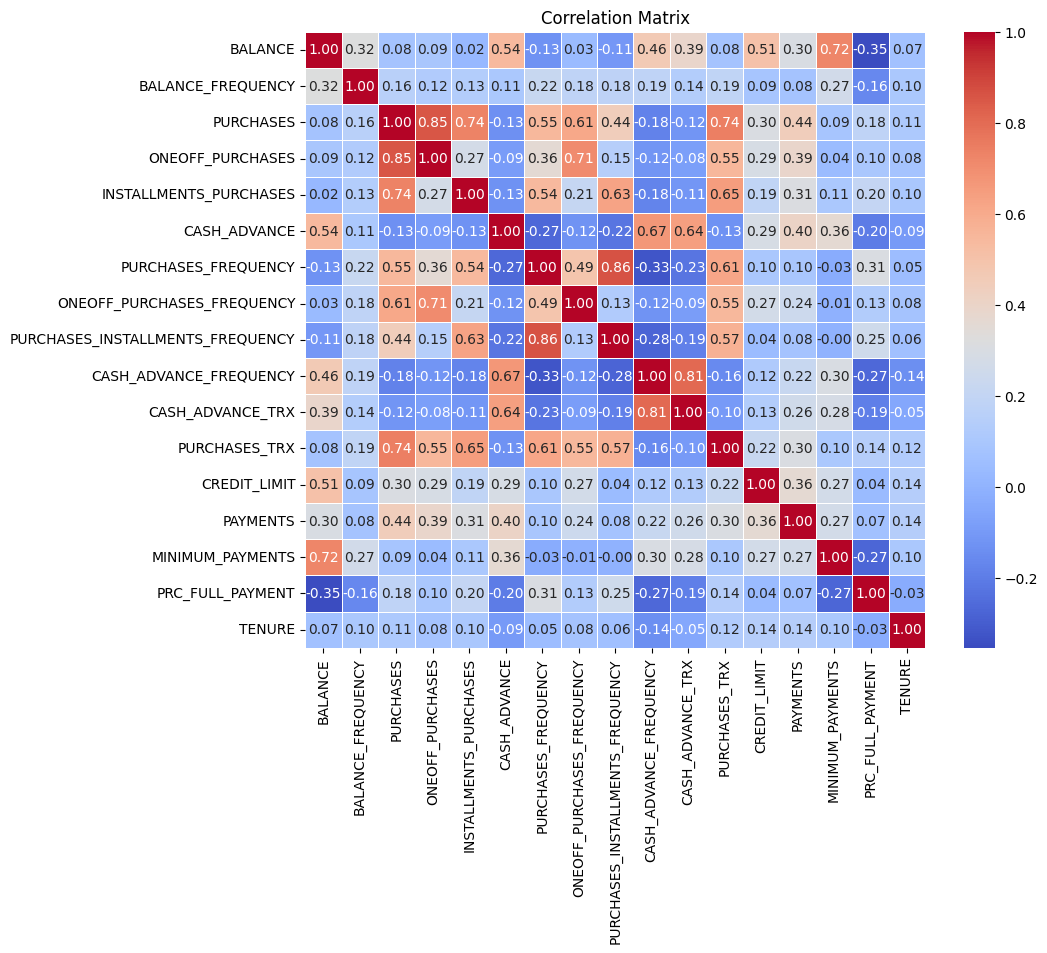

In [30]:
# Membuat plot matriks korelasi menggunakan heatmap
correlation_matrix = data_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Matriks Korelasi adalah sebuah matriks yang mengukur kekuatan dan arah hubungan linier antara dua atau lebih variabel dalam suatu dataset. Matriks ini memberikan gambaran tentang seberapa erat hubungan antar variabel-variabel tersebut. Setiap elemen matriks korelasi berkisar antara -1 dan 1. 

Nilai 1: Menunjukkan hubungan linier positif sempurna antara dua variabel. Jika satu variabel naik, variabel lainnya juga naik dengan tingkat proporsi yang tetap.

Nilai -1: Menunjukkan hubungan linier negatif sempurna antara dua variabel. Jika satu variabel naik, variabel lainnya turun dengan tingkat proporsi yang tetap.

Nilai 0: Menunjukkan tidak adanya hubungan linier antara dua variabel.

dari hasil di atas, banyak yang memiliki nilai 0 positif. Nilai yang mendekati 1 paling tinggi (0,85) adalah hubungan dari atribut PURCHASES dengan ONEOFF_PURCHASES. Sementara nilai yang mendekati -1 paling rendah () adalah hubungan dari atribut BALANCE dengan PRC_FULL_PAYMENT.

### 6.2 Normalisasi Data Dengan StandardScaler()

In [31]:
scaler = StandardScaler()
datanew_fit = scaler.fit_transform(data_new)

In [32]:
data_cols = ['data_new'+str(i)for i in range(datanew_fit.shape[1])]
normalisasi = pd.DataFrame(datanew_fit, columns=data_cols)
normalisasi.head()

,data_new0,data_new1,data_new2,data_new3,data_new4,data_new5,data_new6,data_new7,data_new8,data_new9,data_new10,data_new11,data_new12,data_new13,data_new14,data_new15,data_new16
0,-0.755996,-0.357587,-0.607545,-0.541704,-0.416072,-0.534512,-0.809323,-0.678206,-0.708304,-0.683495,-0.495108,-0.558639,-0.974260,-0.746430,-0.597567,-0.534001,0.359159
1,0.889976,0.077164,-0.686716,-0.541704,-0.561630,3.320898,-1.226186,-0.678206,-0.918682,0.577057,0.131989,-0.655424,0.772310,1.541770,0.535453,0.220850,0.359159
2,0.521733,0.511914,-0.045072,0.369381,-0.561630,-0.534512,1.274984,2.745837,-0.918682,-0.683495,-0.495108,-0.074713,0.917858,-0.499931,-0.005114,-0.534001,0.359159
3,-0.351572,0.511914,-0.673438,-0.522850,-0.561630,-0.534512,-1.017756,-0.392871,-0.918682,-0.683495,-0.495108,-0.607032,-0.916041,-0.466928,-0.469692,-0.534001,0.359159
4,0.164942,0.511914,0.419755,-0.541704,1.472633,-0.534512,0.441262,-0.678206,0.553969,-0.683495,-0.495108,-0.268283,-0.741384,-0.043614,2.156835,-0.534001,0.359159


Normalisasi data adalah proses mengubah nilai-nilai dari berbagai variabel ke dalam rentang skala yang seragam atau normal. Tujuan normalisasi adalah untuk menghilangkan perbedaan skala antara variabel-variabel, sehingga setiap variabel memberikan kontribusi yang seimbang dalam analisis atau pemodelan. normalisasi data dilakukan dengan menggunakan metode Z-Score. Kami menggunakan StandardScaler, data pada data_new telah dinormalisasi sehingga memiliki rata-rata nol dan deviasi standar satu pada setiap fiturnya. DataFrame baru (normalisasi) dibuat untuk menyimpan data hasil normalisasi dengan nama kolom yang sesuai.

## 6. pelatihan model PCA dan CLustering

### 6.1 Pelatihan model PCA

In [33]:
pca_data = PCA(n_components=2)
principal = pca_data.fit_transform(datanew_fit)

PCA(n_components=2) adalah objek dari kelas PCA yang disediakan oleh scikit-learn. Objek ini digunakan untuk melakukan analisis komponen utama dengan mengurangi dimensi data menjadi 2 komponen utama.

fit_transform digunakan untuk menghitung komponen utama dari data yang sudah dinormalisasi (datanew_fit). principal akan menjadi hasil dari transformasi data ke ruang komponen utama.

In [34]:
principal_data = pd.DataFrame(data=principal,columns=['komponen 1', 'komponen 2'])
principal_data.head()

,komponen 1,komponen 2
0,-1.550050,-1.757063
1,-2.022887,2.672172
2,1.169745,0.073892
3,-1.572710,-1.244908
4,0.691045,0.071539


Membuat DataFrame baru (principal_data) dari data hasil transformasi ke komponen utama. Nama kolomnya adalah 'komponen 1' dan 'komponen 2'.

In [35]:
print('penjelasan variasi per komponen:{}'.format(pca_data.explained_variance_ratio_))

penjelasan variasi per komponen:[0.28231523 0.21884908]


explained_variance_ratio_ adalah atribut dari objek PCA yang berisi rasio variasi yang dijelaskan oleh setiap komponen utama. Dalam konteks ini, syntax ini mencetak rasio variasi yang dijelaskan oleh masing-masing dari dua komponen utama.

Kesimpulan PCA:

Dengan menggunakan PCA, data yang sudah dinormalisasi (datanew_fit) telah direduksi dimensinya menjadi dua komponen utama (komponen 1 dan komponen 2). DataFrame baru (principal_data) dibuat untuk menyimpan data hasil reduksi dimensi, dan lima baris pertama dari DataFrame tersebut ditampilkan.  Semakin tinggi rasio variasi, semakin banyak informasi yang dijelaskan oleh komponen utama tersebut. dari keluaran diatas komponen 1 menampung 28,2% informasi sedangkan komponen 2 hanya menampung 21,8% informasi.

### 6.2 Clustering Dengan Kmeans

In [36]:
kmeans = KMeans(n_clusters=3,random_state=0)
model = kmeans.fit(principal)
model.labels_

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 0, 2, ..., 2, 2, 2])

KMeans(n_clusters=3, random_state=0) adalah objek dari kelas KMeans yang digunakan untuk melakukan klastering menggunakan algoritma K-Means. n_clusters=3 menunjukkan bahwa kita ingin membentuk 3 klaster. Model ini kemudian di-fit ke data principal yang telah direduksi dimensinya. Setelah model K-Means di-fit ke data, kita dapat mengakses atribut labels_ untuk melihat label klaster yang telah ditetapkan kepada setiap titik data.

In [37]:
data_new_2 = data_new.copy()
data_new_2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


Membuat salinan dari data awal (data_new) ke DataFrame baru (data_new_2). Ini dilakukan agar kita dapat menambahkan label klaster tanpa memodifikasi data asli.

In [38]:
data_new_2['labels'] = pd.Series(model.labels_)
data_new_2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,2.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,2.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,2.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2.0


Menambahkan kolom baru 'labels' ke DataFrame (data_new_2) yang berisi label klaster yang ditetapkan oleh algoritma K-Means. pd.Series(model.labels_) digunakan untuk mengubah array label menjadi objek Series yang dapat ditambahkan ke DataFrame.

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

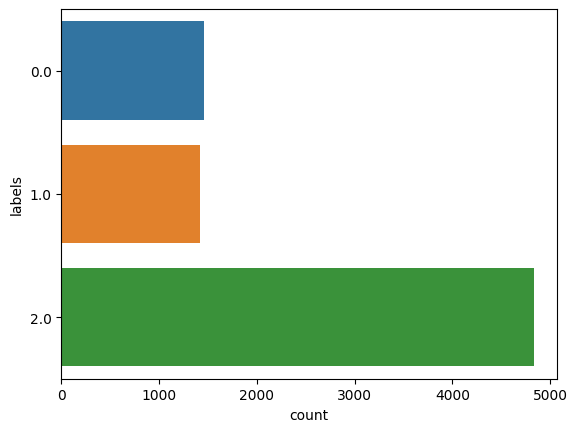

In [39]:
sns.countplot(y=data_new_2['labels'])
plt.show()

Menggunakan library Seaborn untuk membuat countplot yang menunjukkan distribusi klaster. Setiap batang dalam plot menunjukkan jumlah data points yang termasuk dalam klaster tertentu.

In [40]:
clusters = pd.concat([data_new_2, pd.DataFrame({'cluster': data_new_2['labels']})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,2.0,2.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.0,0.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,2.0,2.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,2.0,2.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2.0,2.0


Membuat DataFrame baru yang hanya berisi satu kolom yaitu 'cluster', dan nilainya diambil dari kolom 'labels' dari DataFrame data_new_2. Menggunakan fungsi pd.concat untuk menyatukan DataFrame data_new_2 dan DataFrame baru yang berisi kolom 'cluster'. axis=1 menunjukkan bahwa penyatuan dilakukan berdasarkan kolom (bukan baris). Jadi, setelah menjalankan syntax tersebut, DataFrame clusters akan terdiri dari semua kolom dari data_new_2 dan tambahan satu kolom 'cluster' yang berisi label klaster untuk setiap baris data.

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

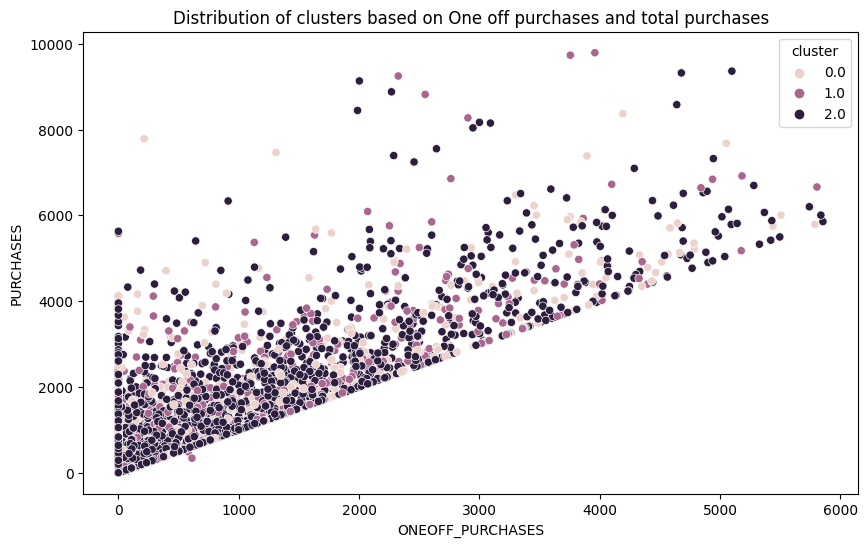

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=clusters, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

membuat scatter plot yang menggambarkan distribusi titik-titik berdasarkan dua variabel, yaitu 'ONEOFF_PURCHASES' dan 'PURCHASES', dan warna titik-titik ditentukan oleh kolom 'cluster' dari DataFrame clusters.

## 7. KESIMPULAN

Berdasarkan hasil analisis kami, Clustering dalam analisis data bertujuan untuk mengelompokkan data ke dalam kelompok atau klaster berdasarkan kemiripan karakteristik. Kami melakukan clustering dengan menggunakan metode K-Means. Metode ini bekerja dengan cara mengelompokkan data menjadi k klaster di mana setiap data punya jarak yang lebih dekat dengan pusat klaster (centroid) dari pada pusat klaster klaster lainnya. Berikut adalah rangkuman dari tahapan yang telah kami lakukan:

1. Pada tahap mengatasi missing value, langkah awal kami mencari nilai yang missing di setiap kolom. Terdapat nilai yang missing pada atribut MINIMUM_PAYMENTS sehingga kami menghapus missing value tersebut agar tidak terjadi kesalahan dalam interpretasi data.

2. Pada tahapan visualisasi data dengan Scatter plot, dimana kami menggunakan 4 atribut sebagai contoh terapan visualisasi data scatterplot dan sekaligus untuk mencari nilai outliers yang ada pada atribut tersebut. Setelah melihat nilai outliers yang ada, kami menghilangkan nilai tersebut untuk meningkatkan konsistensi dan stabilitas pada dataset.

3. Pada tahapan Normalisasi data, kami menggunakan StandardScaler, data pada data_new telah dinormalisasi sehingga memiliki rata-rata nol dan deviasi standar satu pada setiap fiturnya. DataFrame baru (normalisasi) dibuat untuk menyimpan data hasil normalisasi dengan nama kolom yang sesuai.

4. Pada tahapan pelatihan model PCA dan Clustering, pada pelatihan model PCA didapatkan rasio variasi komponen 1 menampung 28,2% informasi sedangkan komponen 2 hanya menampung 21,8% informasi. Dan pada tahapan clustering kami menggunakan scatter plot untuk melihat distribusi klasterisasi berdasarkan atribut ONEOFF_PURCHASES dan PURCHASES.

Dengan menggabungkan analisis data dan pemodelan machine learning, proyek ini telah memberikan wawasan yang signifikan tentang faktor-faktor yang dapat menjadi acuan untuk menentukan strategi pemasaran.

## 8. PICKLE

In [43]:
filename = 'ClusteringModel.sav'

# Simpan model ke dalam file pickle
with open(filename, 'wb') as file:
    pickle.dump(kmeans, file)